### Objective -  Analysing sales data and Increase Revenue

In [1]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
#Getting the dataset in Pandas Dataframe
df = pd.read_csv('Sales Data.csv', encoding='unicode_escape')

##### Understanding the Dataset

In [6]:
df.shape

(11251, 14)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


#### Data Cleaning

In [9]:
#Removing the empty columns that are not required for analysis
df.drop(['Status','Unnamed'],axis=1, inplace=True)

In [10]:
#To check the columns after deletion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [11]:
#Check for NULL values if it is there
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
#Getting the rows that have alleast one null value
null_rows= df[df.isnull().any(axis=1)]

print("Rows with Null values")
print(null_rows)

Rows with Null values
     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  1

In [13]:
#Calulate the mean for the Product_category and fill it where the Amount is NULL
df['Amount']= df.groupby('Product_Category')['Amount'].transform(lambda x:x.fillna(x.mean()))

In [15]:
#Checking the change for 1 of the empty rows 
select_row = df[(df['User_ID']==1000326) & (df['Product_ID']=='P00120542')]
print(select_row)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status    State  \
293  1000326  Jonathan  P00120542      M   53               0  Gujarat   

        Zone Occupation  Product_Category  Orders        Amount  
293  Western  IT Sector  Footwear & Shoes       3  14707.468791  


In [16]:
#Check for NULL values if it is there
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
#Change Amount datatype to Int
df['Amount']= df['Amount'].astype('int')

In [19]:
df['Amount'].dtypes

dtype('int32')

In [21]:
#Now the final columns we have in the dataset
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [22]:
#Renaming the Marital_Status col to Married
df.rename(columns={'Marital_Status': 'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [23]:
#Summarize the data we have using describe
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [24]:
#Using Describe on the relevent columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [25]:
#Defining a function to categorize age
def category_age(age):
    if age<=17:
        return '0-17'
    elif age<=25:
        return '18-25'
    elif age<=35:
        return '26-35'
    elif age<=45:
        return '36-45'
    elif age<=50:
        return '45-50'
    elif age<=55:
        return '51-55'
    else:
        return '55+'
    
#Creating Age_Group as new column
df['Age_Group'] = df['Age'].apply(category_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

### EDA - Exploratory Data Analysis

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

#### Analysis on Gender

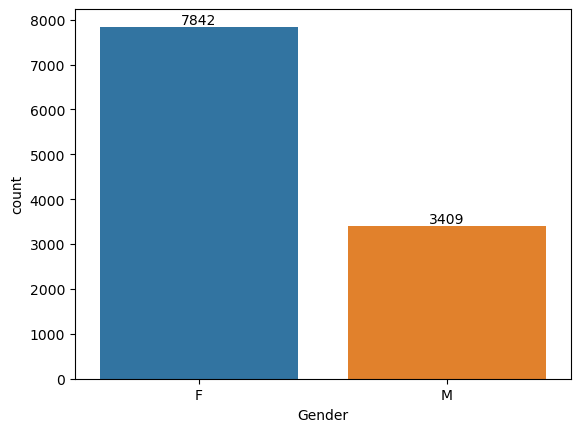

In [28]:
#Gender - Plotting the barplot for Gender and the count - No. of orders vs Gender

ax = sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)


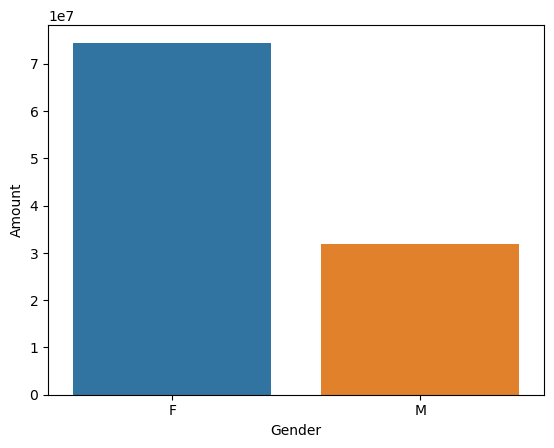

In [32]:
#Plotting the graph for Purchaing power based on Gender (Gender vs Total Amount)

sales_gender = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)

ax1= sns.barplot(x='Gender',y='Amount',data=sales_gender)


#### From above graphs we can conclude that most of the buyers are females and also the purchasing power of females are higher than men

#### Analysis on Age 

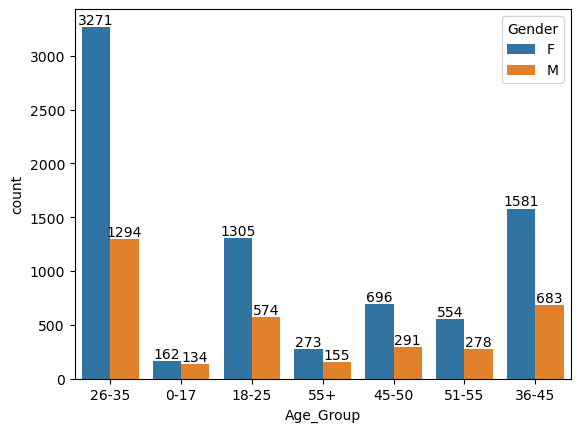

In [34]:
ax2 = sns.countplot(data=df, x='Age_Group',hue='Gender')

for bars in ax2.containers:
    ax2.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

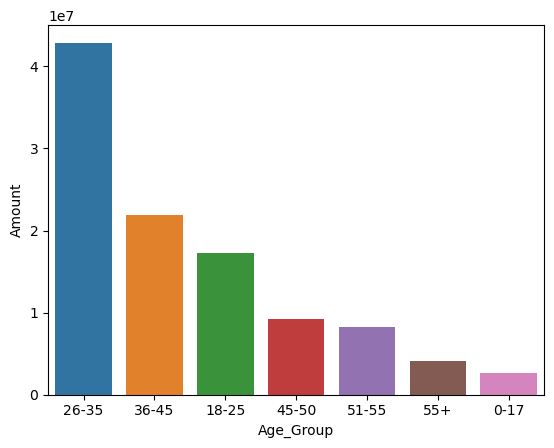

In [36]:
#Plotting the graph for Purchaing power based on Age Group (Age Group vs Total Amount)

sales_age = df.groupby(['Age_Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x='Age_Group',y='Amount',data=sales_age)

#### from the above graphs - most the buyers the females of age group 26-35

#### Analysis on State

<Axes: xlabel='State', ylabel='Orders'>

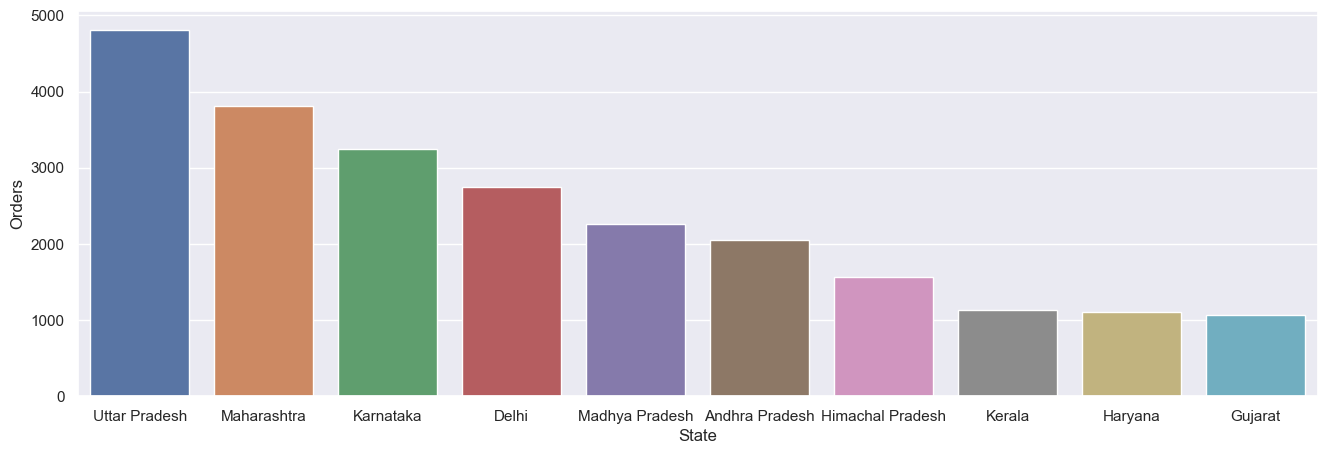

In [38]:
# Total Number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state, x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

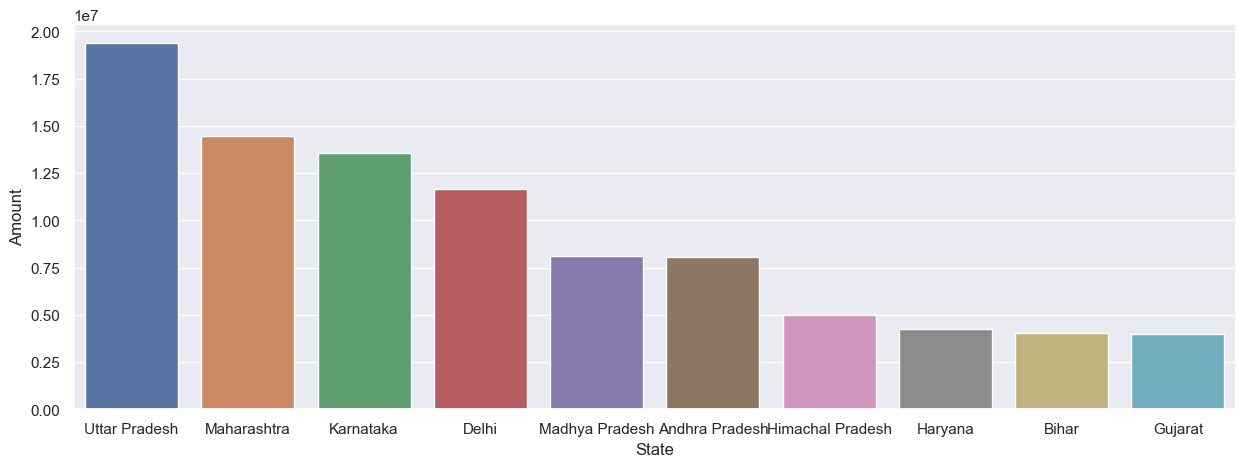

In [40]:
# Total Number of Amount from top 10 states

sales_state_amt = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state_amt, x='State',y='Amount')

#### from the graphs we can see that most of the orders and total sales is from UP, Maharashtra, Karnataka

#### Marital Status 

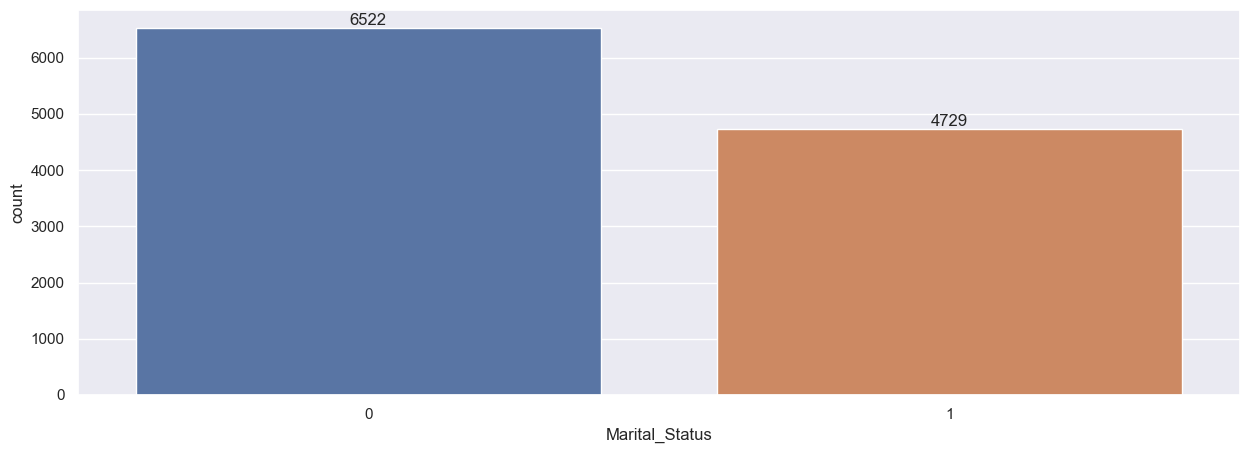

In [41]:
ax5= sns.countplot(data=df,x='Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax5.containers:
    ax5.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

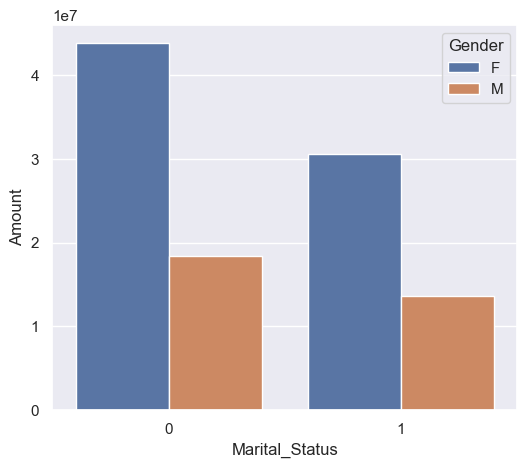

In [42]:
sales_state_amt = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (6,5)})
sns.barplot(data=sales_state_amt, x='Marital_Status',y='Amount',hue='Gender')

#### from the above graphs we can that most of the buyers are unmarried (women) 

#### Analysis on Occupation

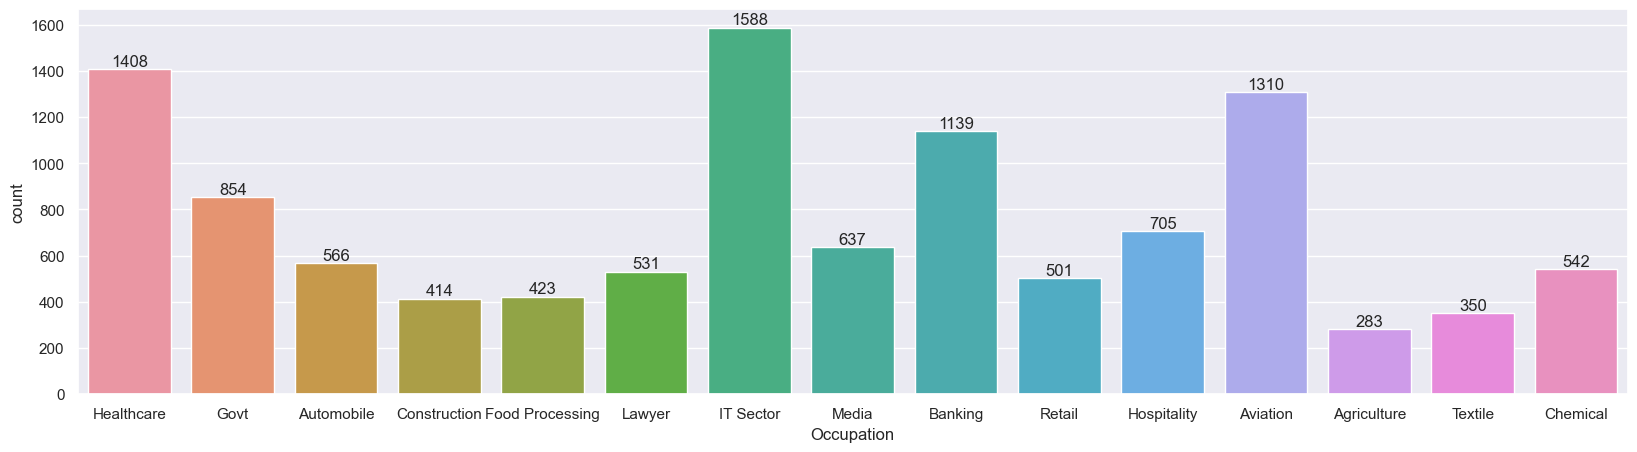

In [59]:
ax6= sns.countplot(data=df,x='Occupation')

sns.set(rc={'figure.figsize':(20,5)})
for bars in ax6.containers:
    ax6.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

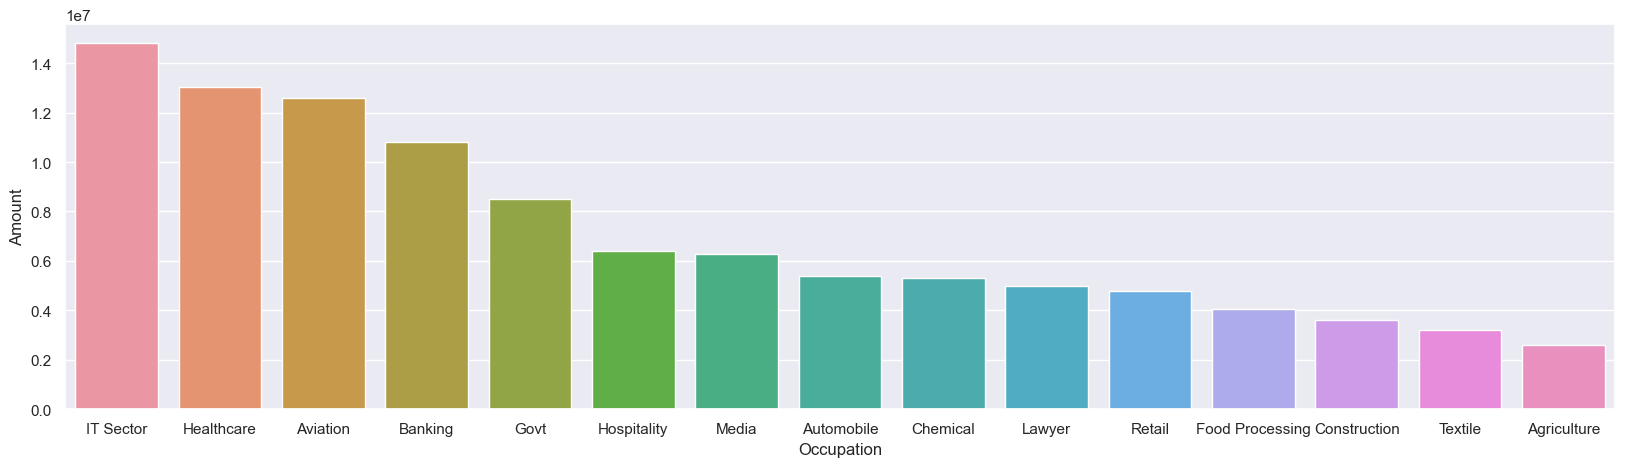

In [51]:
state_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=state_occupation,x='Occupation',y='Amount')
                                                                

#### from the above graphs, most the buyers work in IT, Healthcare and Aviation sector

#### Analysis on Product Category

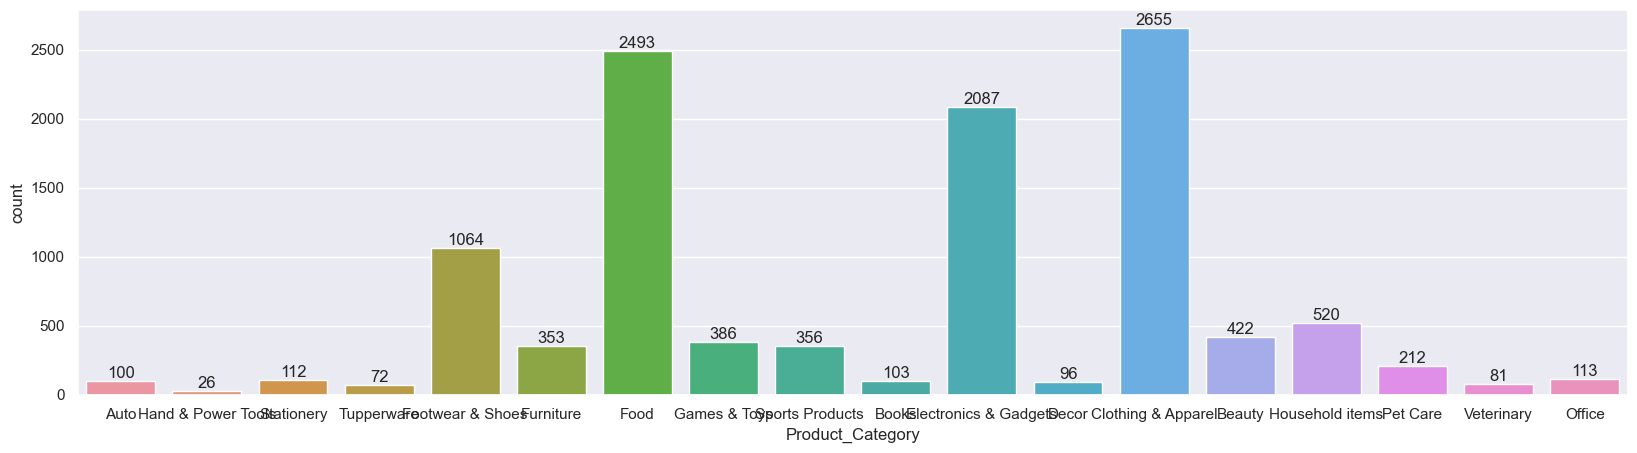

In [58]:
ax7= sns.countplot(data=df,x='Product_Category')

sns.set(rc={'figure.figsize':(20,5)})
for bars in ax7.containers:
    ax7.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

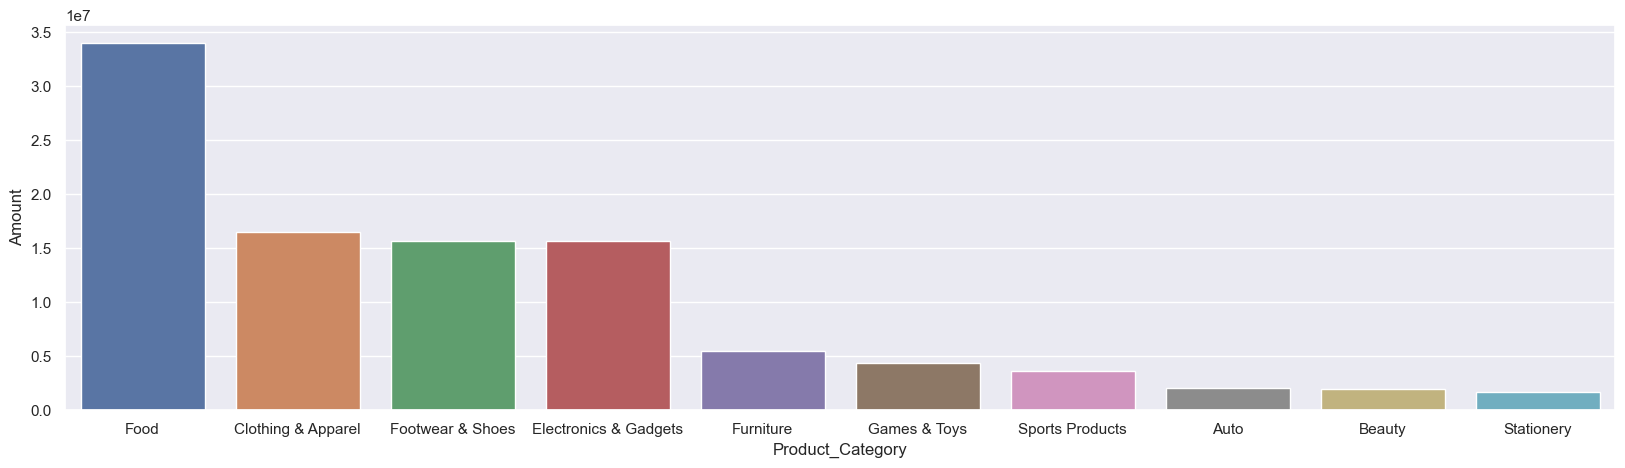

In [60]:
state_product_category=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=state_product_category,x='Product_Category',y='Amount')
                                                              

#### from the graphs we can conclude that most of the products sold are from Food, Clothings and Electronics category

<Axes: xlabel='Product_ID'>

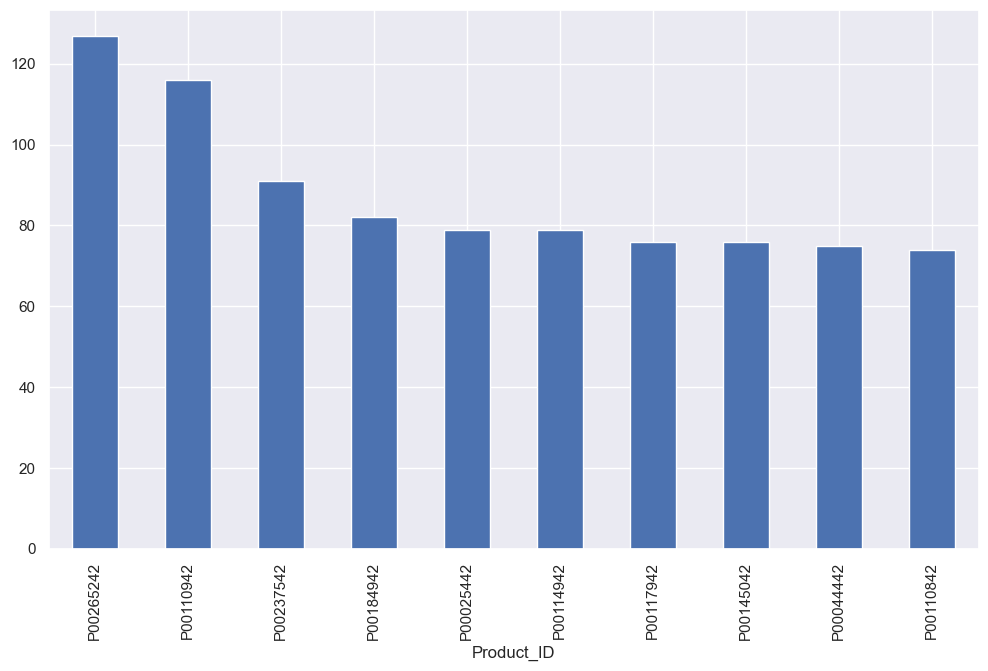

In [61]:
### Top 10 Most sold products

fig1, ax8=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Final Analysis and Conclusion : Women of age-group 26-35 yrs from states UP, Maharashtra and Karnataka  having occupation in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing, Shoes and Electronics category